### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [162]:
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
print(data.head())

# Also display the info on the DataFrame
data.info()


       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $3750

2. Investigate the dataset for missing or problematic data.

In [3]:
# Check for null values in columns
null_columns = data.columns[data.isnull().any()]

if len(null_columns) > 0:
    print("Columns with null values:")
    for col in null_columns:
        print(f"Column: {col}")
        value_counts = data[col].value_counts(dropna=False)
        print(value_counts)
        print()
else:
    print("No columns contain null values.")
    

Columns with null values:
Column: car
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

Column: Bar
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

Column: CoffeeHouse
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

Column: CarryAway
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

Column: RestaurantLessThan20
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

Column: Restaurant20To50
Restaurant20To50
less1    6077
1~3  

3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
data2 = data
null_columns = data2.columns[data2.isnull().any()]

# Replace null values with the value "Unknown"
for col in null_columns:
    data2[col].fillna("Unknown", inplace=True)
    
# Convert 'age' column to numeric values
data2['age'] = pd.to_numeric(data['age'], errors='coerce')
    

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
# Calculate the total number where "Y=1" as a percentage
total_percentage= (data['Y'].sum() / len(data)) * 100
print(f"{total_percentage:.2f}% of the total observations chose to accept the coupon")

56.84% of the total observations chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

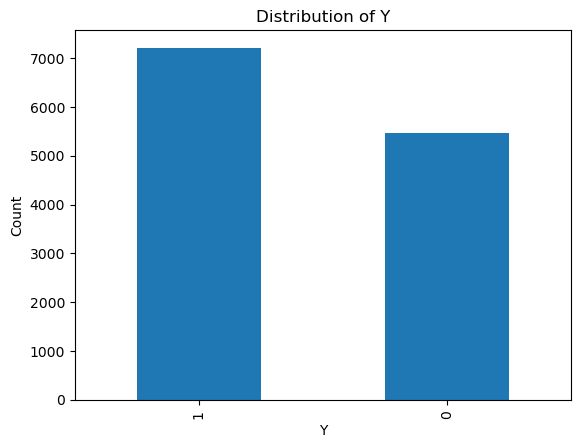

In [7]:
data['Y'].value_counts().plot(kind='bar')
plt.title('Distribution of Y')
plt.xlabel('Y')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


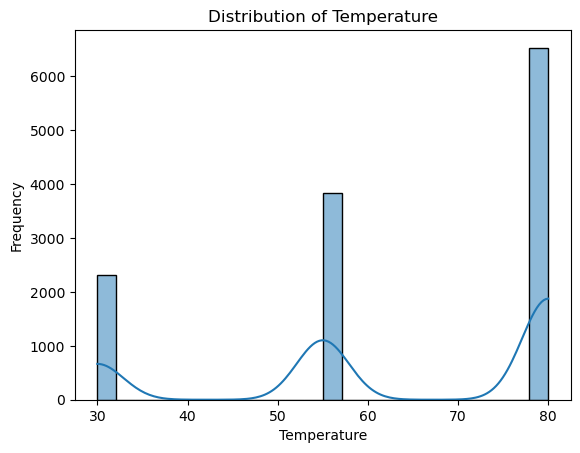

In [8]:
# Plotting the temperature column
sns.histplot(data['temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Create a new DataFrame with rows where 'coupon' is equal to "Bar"
bar_df = data[data['coupon'] == 'Bar']

# Display the head of the new DataFrame
bar_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46.0,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46.0,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46.0,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46.0,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [10]:
# Calculate the number of times "Y=1" in this new dataset

bar_percentage = (bar_df['Y'].sum() / len(bar_df)) * 100
print(f"{bar_percentage:.2f}% of bar coupons were accepted")

41.00% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Calculate the percentage of times "Y" equals 1, grouped by the distinct values in the "Bar" field
bar_3_or_more = bar_df.groupby('Bar')['Y'].mean() * 100

# Display the result as percentages with two decimal places and a '%' sign
print(bar_3_or_more.apply(lambda x: '{:.2f}%'.format(x)))

Bar
1~3        64.74%
4~8        78.00%
Unknown    38.10%
gt8        73.47%
less1      44.39%
never      18.80%
Name: Y, dtype: object


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# Create a new DataFrame with rows where 'Bar' column equals "1~3" or "4~8" or "gt8" and 'age' is greater than or equal to 25
bar_df2 = bar_df[((bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')) & (bar_df['age'] >= 25)]

# Create a new DataFrame with rows where 'Bar' column equals "Unknown", "less1", or "never"
bar_df3 = bar_df[(bar_df['Bar'] == 'Unknown') | (bar_df['Bar'] == 'less1') | (bar_df['Bar'] == 'never')]

# Calculate the percentage of times "Y" equals 1 for bar_df2
bar_df2_percentage = (bar_df2['Y'].sum() / len(bar_df2)) * 100

# Calculate the percentage of times "Y" equals 1 for bar_df3
bar_df3_percentage = (bar_df3['Y'].sum() / len(bar_df3)) * 100

# Display the result as percentages with two decimal places and a '%' sign
print("More than once and over 25: {:.2f}%".format(bar_df2_percentage))
print("All others: {:.2f}%".format(bar_df3_percentage))

More than once and over 25: 69.97%
All others: 29.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [13]:
# Create a new DataFrame for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

bar_df4 = bar_df[((bar_df['passanger'] != 'Kid(s)') | (bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')) & ((bar_df['occupation'] != "farming") | (bar_df['occupation'] != "fishing") | (bar_df['occupation'] != 'forestry'))]

# Create a new DataFrame for all of the other rows
bar_df5 = bar_df[~(((bar_df['passanger'] != 'Kid(s)') | (bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')) & ((bar_df['occupation'] != "farming") | (bar_df['occupation'] != "fishing") | (bar_df['occupation'] != 'forestry')))]

# Calculate the percentage of times "Y" equals 1 for bar_df4
bar_df4_percentage = (bar_df4['Y'].sum() / len(bar_df4)) * 100

# Calculate the percentage of times "Y" equals 1 for bar_df5
bar_df5_percentage = (bar_df5['Y'].sum() / len(bar_df5)) * 100

print("More than once a month, no kids and occupations other than farming, fishing or forestry : {:.2f}%".format(bar_df4_percentage))
print("All others: {:.2f}%".format(bar_df5_percentage))


More than once a month, no kids and occupations other than farming, fishing or forestry : 43.16%
All others: 16.15%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [14]:
# Create the three conditions outlined above
condition_1 = ((bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'widowed')
condition_2 = ((bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')) & (bar_df['age'] < 30)
condition_3 = ((bar_df['RestaurantLessThan20'] == '4~8') | (bar_df['RestaurantLessThan20'] == 'gt8')) & ((bar_df['income'] == '$12500 - $24999') | (bar_df['income'] == '$25000 - $37499') | (data['income'] == '$37500 - $49999'))

# Create a new data set representing those conditions
bar_df6 = data[condition_1 | condition_2 | condition_3]

# Create a new data set representating all the other rows
bar_df7 = data[~(condition_1 | condition_2 | condition_3)]

# Calculate the percentage of times "Y" equals 1 for bar_df6
bar_df6_percentage = (bar_df6['Y'].sum() / len(bar_df6)) * 100

# Calculate the percentage of times "Y" equals 1 for bar_df7
bar_df7_percentage = (bar_df7['Y'].sum() / len(bar_df7)) * 100

print("Drivers who met one of the three conditions : {:.2f}%".format(bar_df4_percentage))
print("All others: {:.2f}%".format(bar_df5_percentage))


Drivers who met one of the three conditions : 43.16%
All others: 16.15%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations and hypothesis about drivers who accepted the bar coupons.

Firstly - the bar coupons were very successful - 41% of all bar coupons were accepted in this group, that's pretty good.

Within this population however,
 - Drivers without kids in the car were more likely to use the coupon (43% vs 21%)
 - Drivers who were less than 30 were more likely to use the coupon (48-50% vs 30-43%)
 - Drivers who go to bars regularly were more likely to use the coupon(69% vs 30%)
 - Drivers with certain careers were more likely to use the coupon than others, Architecture and Engineering, Production occupations and healthcare support (all over 65%)

So, younger drivers with no kids in the car, who visit bars regularly and are in certain professions are much more likely to accept the coupon than the general population.

We could then combine these attributues, and for exampke if we target drivers who are younger, without kids in the car, less than 30 and in the 3 most likely occupations, the success rate can increase significantly in fact in this cohort the success rate is 100%.

However, only 13 drivers match all these criteria, which is too small a group. So it seems when doing this type of analysis a balance needs to be struck between the accuracy of the targeting criteria and overall size of the resulting group. i.e. the goal in this case is likely to maximize the number of coupons redeemed, not maximize the accuracy of the targetting.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [15]:
# For the bar coupons, determine the difference in uptake between drivers with kids in the car and those without
bar_df8 = bar_df[(bar_df['passanger'] != 'Kid(s)')]

bar_df8.head(10)

# Create a new DataFrame for all of the other rows
bar_df9  = bar_df[~(bar_df['passanger'] != 'Kid(s)')]

bar_df9.head(10)

# Calculate the percentage of times "Y" equals 1 for bar_df6
bar_df8_percentage = (bar_df8['Y'].sum() / len(bar_df8)) * 100

# Calculate the percentage of times "Y" equals 1 for bar_df7
bar_df9_percentage = (bar_df9['Y'].sum() / len(bar_df9)) * 100

print("Bar Coupon uptake - No kids : {:.2f}%".format(bar_df8_percentage))
print("Bar Coupon uptake - with Kids: {:.2f}%".format(bar_df9_percentage))



Bar Coupon uptake - No kids : 43.29%
Bar Coupon uptake - with Kids: 20.87%


age
21.0    50.599520
26.0    48.860759
31.0    36.873156
36.0    30.143541
41.0    43.258427
46.0    34.862385
Name: Y, dtype: float64


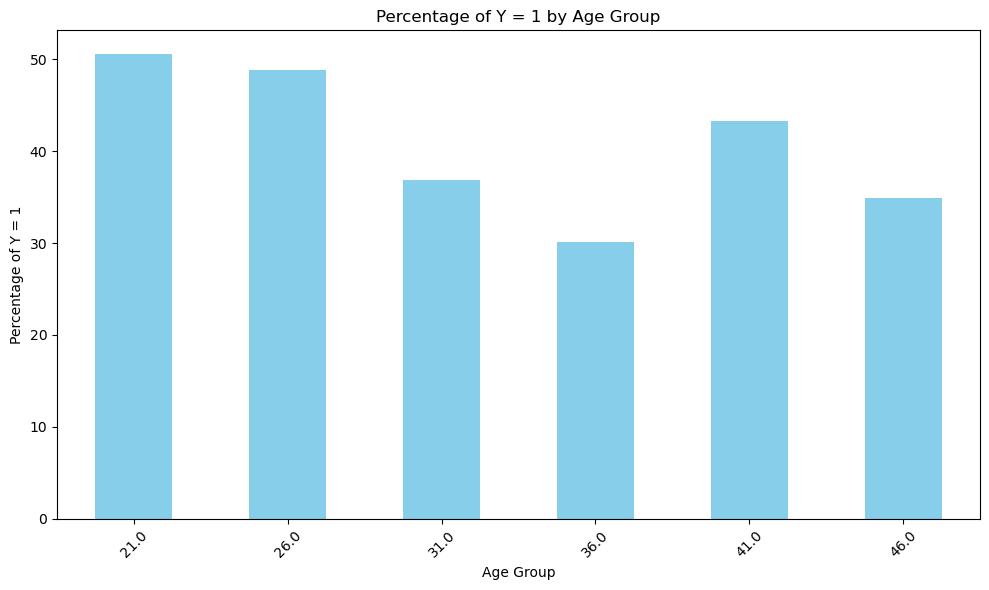

In [175]:
# Determine the percentage uptake in bar coupons, broken down by age.

Y_by_age = bar_df.groupby('age')['Y'].apply(lambda x: (x == 1).mean() * 100)

# Print the resulting Series
print(Y_by_age)

# Group the DataFrame by 'age' and calculate the percentage of 'Y' equal to "1" within each group
Y_by_age = bar_df.groupby('age')['Y'].apply(lambda x: (x == 1).mean() * 100)

# Plot the percentages
plt.figure(figsize=(10, 6))
Y_by_age.plot(kind='bar', color='skyblue')
plt.title('Percentage of Y = 1 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Y = 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Group the Bar dataframe by 'occupation' and calculate the percentage of 'Y' equal to "1" within each group
Y_by_occupation = bar_df.groupby('occupation')['Y'].apply(lambda x: (x == 1).mean() * 100)

# Print the resulting Series
print(Y_by_occupation)

# Group the DataFrame by 'occupation' and calculate the percentage of 'Y' equal to "1" within each group
Y_by_occupation = bar_df.groupby('occupation')['Y'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='percentage')

# Sort the DataFrame by 'percentage'
Y_by_occupation = Y_by_occupation.sort_values(by='percentage', ascending=False)

# Create an interactive bar plot using Plotly
fig = px.bar(Y_by_occupation, x='occupation', y='percentage', color='percentage',
             labels={'occupation': 'Occupation', 'percentage': 'Percentage of Y = 1'},
             title='Percentage of Y = 1 by Occupation', 
             color_continuous_scale='Blues')

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

fig.show()

occupation
Architecture & Engineering                   66.666667
Arts Design Entertainment Sports & Media     33.000000
Building & Grounds Cleaning & Maintenance    28.571429
Business & Financial                         46.067416
Community & Social Services                  29.545455
Computer & Mathematical                      37.500000
Construction & Extraction                    54.166667
Education&Training&Library                   28.571429
Farming Fishing & Forestry                   44.444444
Food Preparation & Serving Related           47.916667
Healthcare Practitioners & Technical         43.902439
Healthcare Support                           65.909091
Installation Maintenance & Repair            44.444444
Legal                                        35.294118
Life Physical Social Science                 62.500000
Management                                   54.621849
Office & Administrative Support              50.476190
Personal Care & Service                      37.037037

In [21]:
# Create a cohort of bar coupon users who are young, go to bars regularly and are in one of the most likely occupations
condition_1 = ((bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')) & (bar_df['passanger'] != 'Kid(s)')
condition_2 = (bar_df['age'] < 30)
condition_3 = ((bar_df['occupation'] == 'Architecture & Engineering') | (bar_df['occupation'] == 'Production Occupations')) | (bar_df['occupation'] == 'Healthcare Support')  # corrected logic

# Create a new data set representing those conditions
bar_df10 = bar_df[condition_1 & condition_2 & condition_3]

# Create a new data set representing all the other rows
bar_df11 = bar_df[~(condition_1 & condition_2 & condition_3)]

# Calculate the percentage of times "Y" equals 1 for bar_df10
bar_df10_percentage = (bar_df10['Y'].sum() / len(bar_df10)) * 100

# Calculate the percentage of times "Y" equals 1 for bar_df11
bar_df11_percentage = (bar_df11['Y'].sum() / len(bar_df11)) * 100

print("Drivers who met one of the three conditions: {:.2f}%".format(bar_df10_percentage))
print("All others: {:.2f}%".format(bar_df11_percentage))

num_rows = len(bar_df10)
print("Number of rows in bar_df10:", num_rows)

Drivers who met one of the three conditions: 100.00%
All others: 40.62%
Number of rows in bar_df10: 13


Percentage of times 'direction_same' = 1 and 'Y' = 1: 23.34%
Percentage of times 'direction_same' = 0 and 'Y' = 1: 76.66%
Percentage of times 'direction_opp' = 1 and 'Y' = 1: 76.66%
Percentage of times 'direction_opp' = 0 and 'Y' = 1: 23.34%


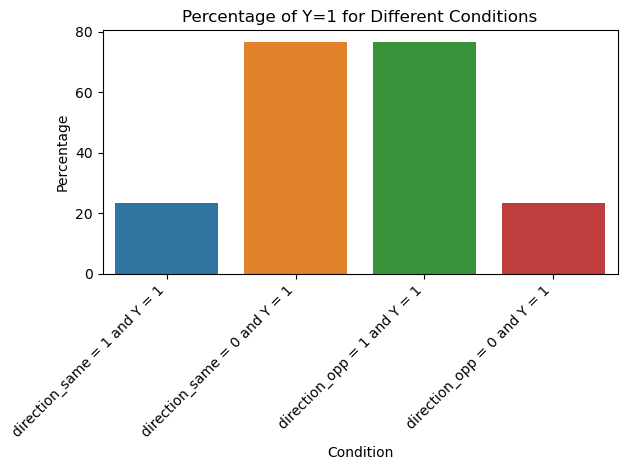

In [140]:
# Calculate the total number of rows where 'Y' equals 1
total_Y_1 = (bar_df['Y'] == 1).sum()

# Calculate the percentage of times 'direction_same' equals 1 and 'Y' equals 1
direction_same_1_Y_1 = ((bar_df['direction_same'] == 1) & (bar_df['Y'] == 1)).sum() / total_Y_1 * 100

# Calculate the percentage of times 'direction_same' equals 0 and 'Y' equals 1
direction_same_0_Y_1 = ((bar_df['direction_same'] == 0) & (bar_df['Y'] == 1)).sum() / total_Y_1 * 100

# Calculate the percentage of times 'direction_opp' equals 1 and 'Y' equals 1
direction_opp_1_Y_1 = ((bar_df['direction_opp'] == 1) & (bar_df['Y'] == 1)).sum() / total_Y_1 * 100

# Calculate the percentage of times 'direction_opp' equals 0 and 'Y' equals 1
direction_opp_0_Y_1 = ((bar_df['direction_opp'] == 0) & (bar_df['Y'] == 1)).sum() / total_Y_1 * 100

print("Percentage of times 'direction_same' = 1 and 'Y' = 1: {:.2f}%".format(direction_same_1_Y_1))
print("Percentage of times 'direction_same' = 0 and 'Y' = 1: {:.2f}%".format(direction_same_0_Y_1))
print("Percentage of times 'direction_opp' = 1 and 'Y' = 1: {:.2f}%".format(direction_opp_1_Y_1))
print("Percentage of times 'direction_opp' = 0 and 'Y' = 1: {:.2f}%".format(direction_opp_0_Y_1))

# Define the data for the plot
data = {
    'Condition': ['direction_same = 1 and Y = 1', 'direction_same = 0 and Y = 1', 'direction_opp = 1 and Y = 1', 'direction_opp = 0 and Y = 1'],
    'Percentage': [percentage_direction_same_1_Y_1, percentage_direction_same_0_Y_1, percentage_direction_opp_1_Y_1, percentage_direction_opp_0_Y_1]
}

# Create a DataFrame from the data
plot_data = pd.DataFrame(data)

# Plot the percentages
sns.barplot(x='Condition', y='Percentage', data=plot_data)
plt.title('Percentage of Y=1 for Different Conditions')
plt.xlabel('Condition')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [22]:
# Plot for 'weather' field against 'Y' column
fig1 = px.histogram(bar_df, x='weather', color='Y', title='Weather vs Y')
fig1.update_layout(xaxis_title='Weather', yaxis_title='Count', barmode='group')

# Plot for 'temperature' field against 'Y' column
fig2 = px.histogram(bar_df, x='temperature', color='Y', title='Temperature vs Y')
fig2.update_layout(xaxis_title='Temperature', yaxis_title='Count', barmode='group')

# Show the plots
fig1.show()
fig2.show()

In [23]:
# Compare the uptake of the different coupon types and the Weather/Temperature

import plotly.express as px

# Plot for 'weather' field against 'Y' column with 'coupon' as facet
fig1 = px.histogram(data, x='weather', color='Y', facet_col='coupon', title='Weather vs Y (Coupon-wise)',
                    facet_col_wrap=3)  # Adjust facet_col_wrap as needed
fig1.update_layout(xaxis_title='Weather', yaxis_title='Count', barmode='group')

# Plot for 'temperature' field against 'Y' column with 'coupon' as facet
fig2 = px.histogram(data, x='temperature', color='Y', facet_col='coupon', title='Temperature vs Y (Coupon-wise)',
                    facet_col_wrap=3)  # Adjust facet_col_wrap as needed
fig2.update_layout(xaxis_title='Temperature', yaxis_title='Count', barmode='group')

# Show the plots
fig1.show()
fig2.show()

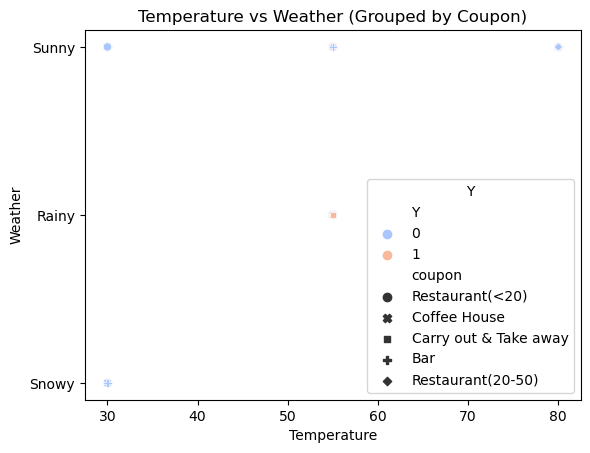

In [24]:
# Create a scatterplot of coupon type against "Y" showing the weather and the temperature
sns.scatterplot(data=data, x='temperature', y='weather', hue='Y', style='coupon', palette='coolwarm')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.title('Temperature vs Weather (Grouped by Coupon)')

# Show the plot
plt.legend(title='Y')
plt.show()